In [2]:
import sys
sys.path.insert(1, '../')
import numpy as np
import util.io as io
import matplotlib.pyplot as plt
from nufft import *
from util.fft import *
from scipy import interpolate
from tqdm.notebook import tqdm
import util.phantom as phantom
from pynufft import NUFFT

In [3]:
ns = 64**2                        
t   = np.linspace(0,np.sqrt(0.5),ns)
kx = t**2*np.cos(2*np.pi*32*t)
ky = t**2*np.sin(2*np.pi*32*t)

In [3]:
traj = np.zeros([64**2,2])
traj[:,0] = kx
traj[:,1] = ky

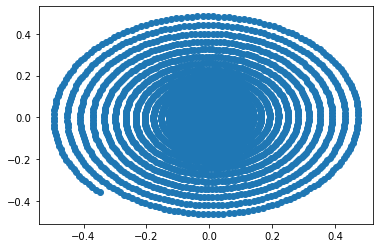

In [4]:
plt.scatter(traj[:,0], traj[:,1])

In [14]:
image = phantom.brain(64, 1)
crd = traj*2 *np.pi
NufftObj = NUFFT()
NufftObj.plan(crd, (image.shape[0],image.shape[1]), (image.shape[0]*2,image.shape[1]*2),(5, 5))
dat = NufftObj.forward(image)

In [17]:
# dcf = voronoidcf(traj, 95)
# mat = np.zeros([128, 128], dtype=complex)
# mat = gridding(mat, dat, traj, dcf)
gridsize = 128
ns = len(dat)
dcf = pipedcf(traj, ns)
mat = np.zeros([gridsize, gridsize], dtype=complex)
mat = gridding(mat, dat, traj, dcf)

  0%|          | 0/10 [00:00<?, ?it/s]

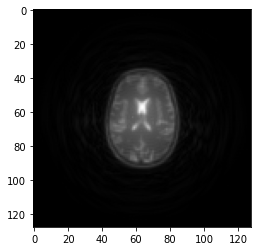

In [18]:
show(ifft2c(mat))